In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

T = 1
t_ = np.linspace(0,T,24*4*T+1)
A_dither = 0.25
f_dither   = 6
sigma_e = 0.005
delta = np.array([0,5])
offset = np.array([0.42,0.73])
epsilon = sys.float_info.epsilon

rho: -0.11283037903740897
rho: 0.9083257021686263
rho: 0.9991986784510538


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


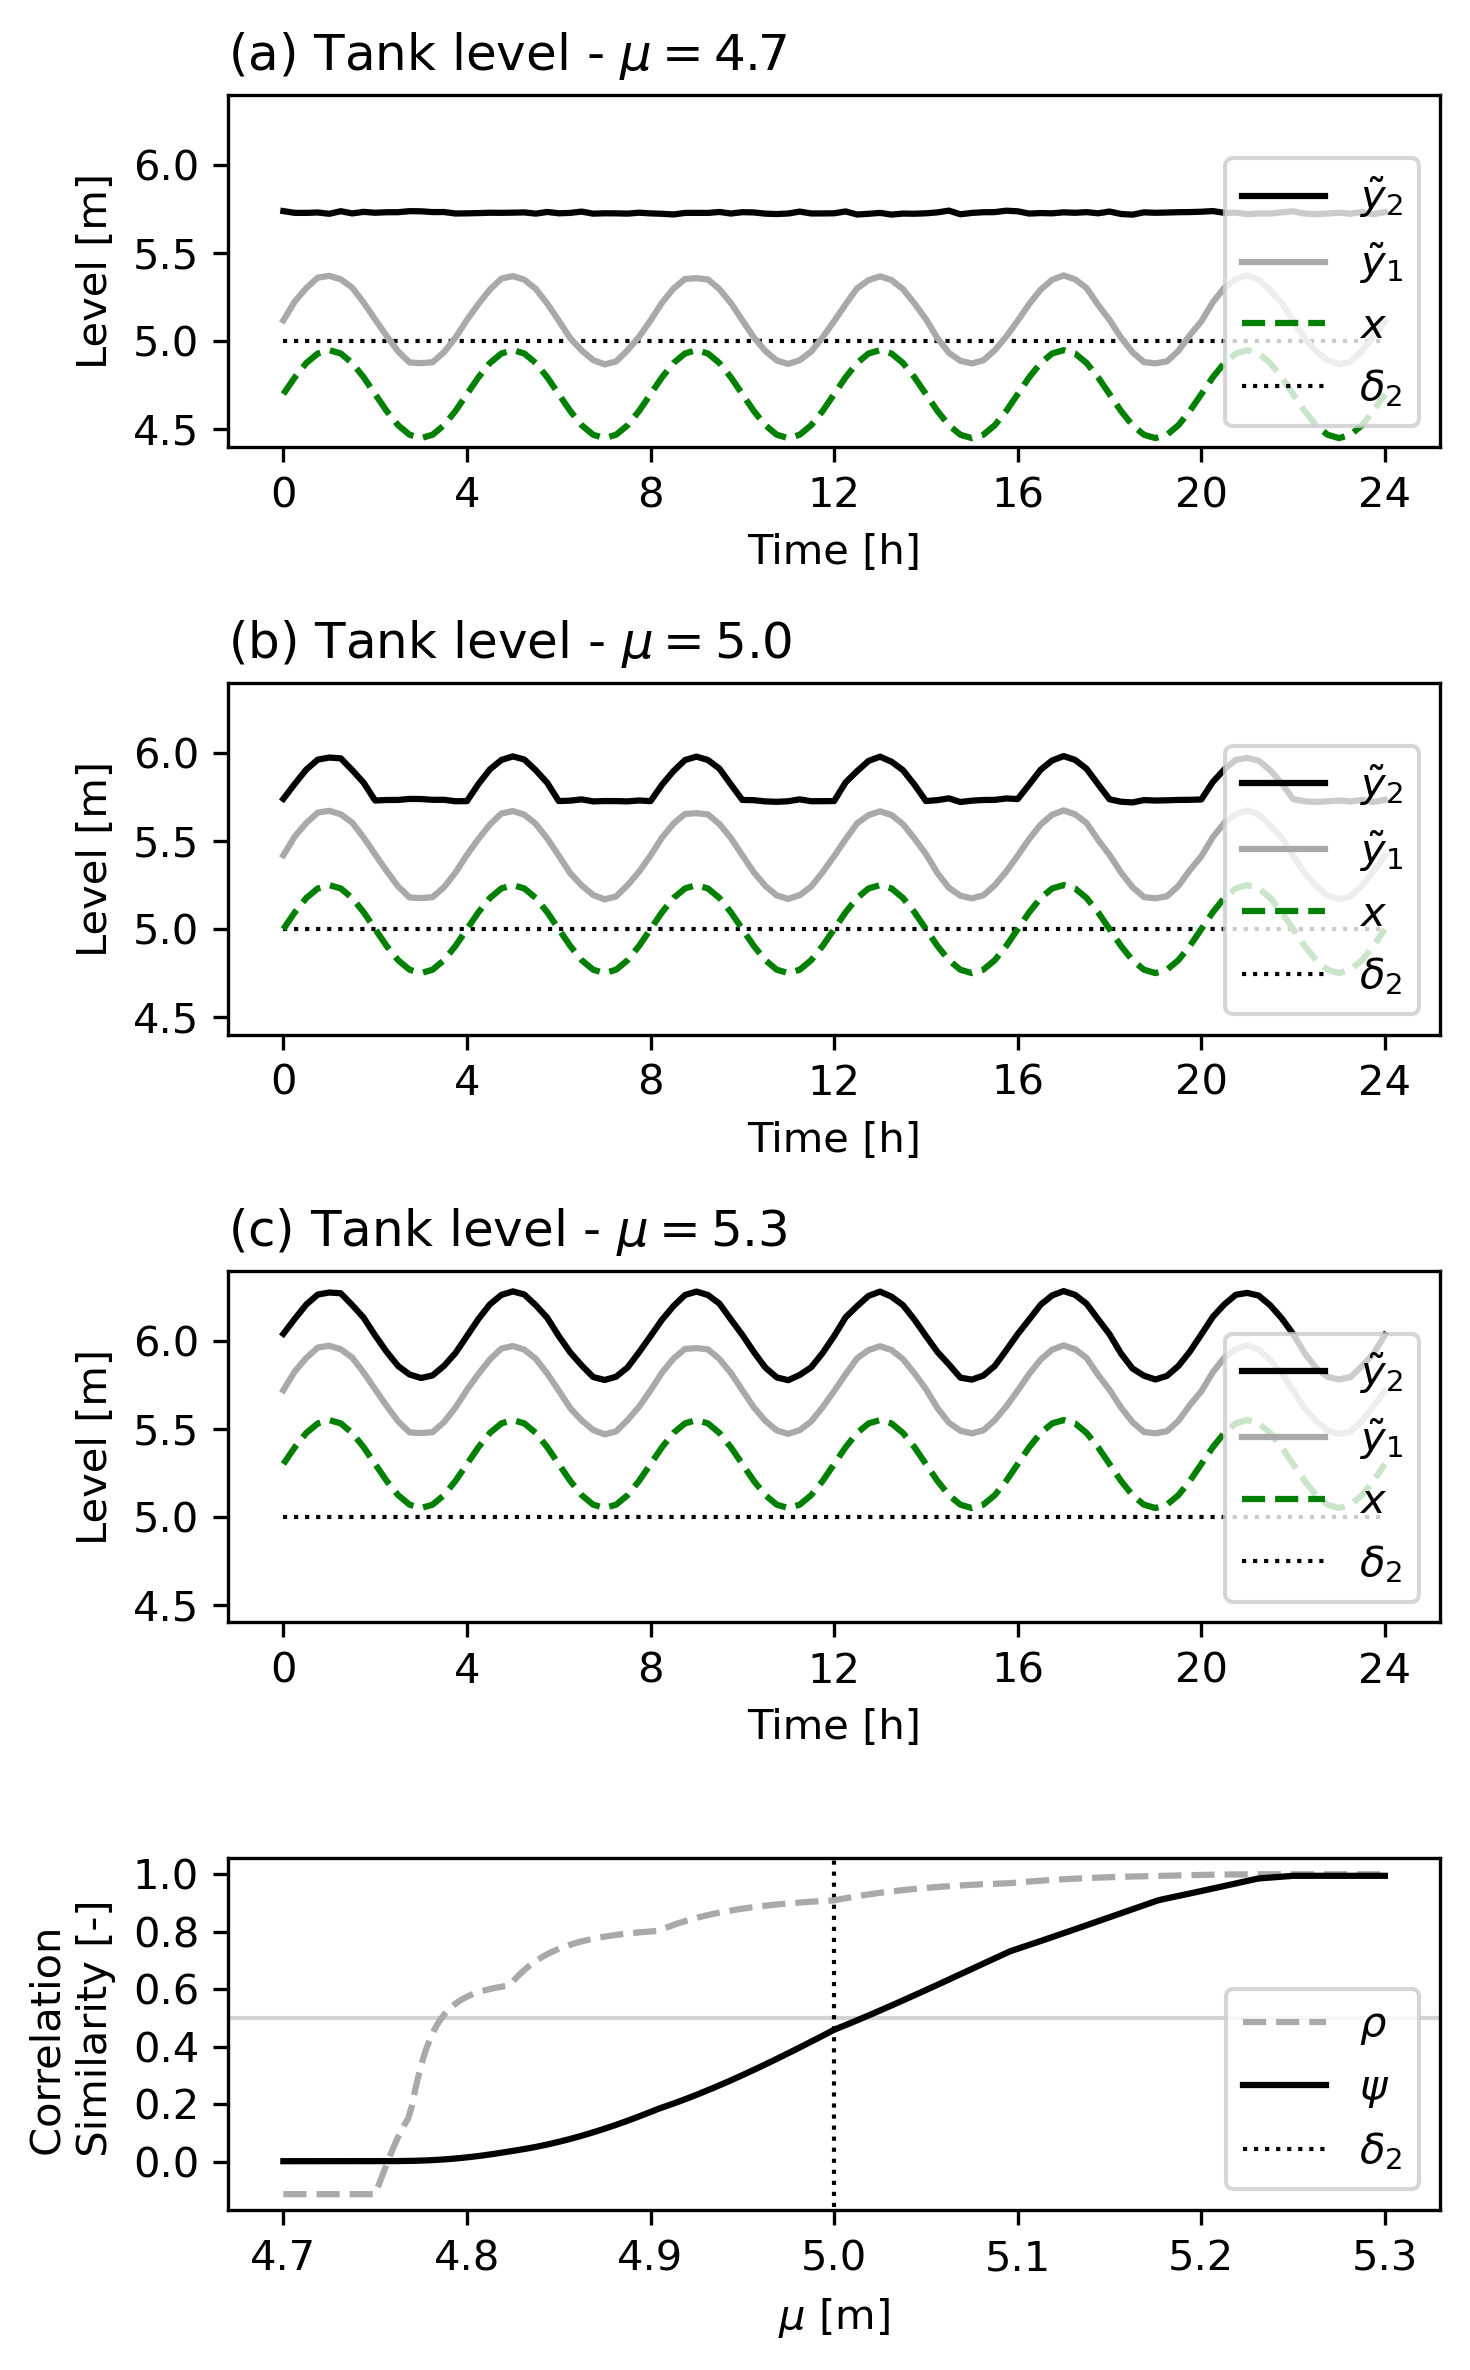

In [2]:

E =sigma_e*np.random.randn(len(t_),2) 
SIGMA = np.zeros([0,2,2])    
RHO = np.zeros([0,2,2]) 
PSI = np.zeros([0])
N_mu_x = 301
mu_x_values = np.linspace(-0.3,+0.3,N_mu_x)+delta[1]

panelnumber = 0
fig, axs = plt.subplots(4,1,figsize=(5,8),dpi=300)
for index, mu_x in enumerate(mu_x_values):
    wave = A_dither*np.sin(2*np.pi*f_dither*t_)[:,None]
    trajectory_x = mu_x+wave
    trajectory_y = np.hstack([np.maximum(delta[0],trajectory_x)+offset[0],
                              np.maximum(delta[1],trajectory_x)+offset[1]])  +E
    Sigma = np.cov(trajectory_y.T) 
    SIGMA = np.append(SIGMA,Sigma[None,:,:],axis=0)
    
    s = np.diag(np.diag(Sigma)**(-1/2))
    Rho = s@Sigma@s.T
    RHO = np.append(RHO,Rho[None,:,:],axis=0)
    
     
    b1  = Sigma[0,0]*(Sigma[0,1]+Sigma[1,0])/2
    b2  = Sigma[1,1]*(Sigma[0,1]+Sigma[1,0])/2
    psi = 1-(np.abs(b1-b2)+epsilon)/(np.abs(b1+b2)+epsilon) 
    PSI = np.append(PSI,[psi],axis=0)

    if index in [0,150,300]:
        if index == 0:
            ax = axs[0]
            pass
        elif index==150: 
            ax = axs[1]
            pass
        elif index==300: 
            ax = axs[2]
            pass
        ax.plot(t_*24,trajectory_y[:,1],'-',color='black',label=r'$\tilde{y}_2$')
        ax.plot(t_*24,trajectory_y[:,0],'-',color='darkgrey',label=r'$\tilde{y}_1$')
        ax.plot(t_*24,trajectory_x,'g--',label=r'$x$')
        ax.hlines(y=5,xmin=0,xmax=24,color='black',lw=1,linestyle=':',label=r'$\delta_2$')
        ax.legend(loc='lower right')
        ax.set_ylim([4.4,6.4])
        ax.set_ylabel('Level [m]')
        ax.set_xticks(np.arange(0,25,4))
        ax.set_xlabel('Time [h]')
        ax.set_title('('+ chr(ord('a')+panelnumber)+') Tank level - $\mu='+str(mu_x)+'$', loc='left')
        panelnumber += 1
        print('rho: '+str(Rho[0,1]))
    pass


ax = axs[3]
ax.plot(mu_x_values,RHO[:,0,1].flatten(),'--',color='darkgrey',label=r'$\rho$') 
ax.plot(mu_x_values,PSI,'-',color='black',label=r'$\psi$') 
ax.set_yticks(np.linspace(0,1,6));
ax.set_ylabel('Correlation \n Similarity [-]')
ax.set_xlabel(r'$\mu$ [m]')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.hlines(y=0.5,xmin=4,xmax=6,color='lightgrey',lw=1,linestyle='-')
ax.vlines(x=5,ymin=-2,ymax=+2,color='black',lw=1,linestyle=':',label=r'$\delta_2$')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.legend(loc='lower right')

plt.tight_layout()
fig.savefig('./figure/illustration_correlation.eps',bbox_inches='tight');
fig.savefig('./figure/illustration_correlation.tiff',bbox_inches='tight');